# Project Dogs in NYC

This is my first project to kind of try to create a data analysis. 
I found this Dataset about licensed dogs in NYC. 
I want to find out which breeds are the most popular. 

This is the Link to the source: https://data.cityofnewyork.us/Health/NYC-Dog-Licensing-Dataset/nu7n-tubp/about_data 

In [1]:
import pandas as pd

import numpy as np

# Read in the file 

In [2]:
df = pd.read_csv("NYC_Dog_Licensing_Dataset.csv")

/var/folders/vx/9t16bgq90bg_lsw032_h4tv00000gn/T/ipykernel_19886/2838553744.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NYC_Dog_Licensing_Dataset.csv")


# This is what the data looks like:

In [3]:
df.head()

,AnimalName,AnimalGender,AnimalBirthYear,BreedName,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
0,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,10035.0,09/12/2014,09/12/2017,2016
1,YOGI,M,2010,Boxer,10465.0,09/12/2014,10/02/2017,2016
2,ALI,M,2014,Basenji,10013.0,09/12/2014,09/12/2019,2016
3,QUEEN,F,2013,Akita Crossbreed,10013.0,09/12/2014,09/12/2017,2016
4,LOLA,F,2009,Maltese,10028.0,09/12/2014,10/09/2017,2016


# These are the datatypes

In [4]:
df.dtypes

AnimalName             object
AnimalGender           object
AnimalBirthYear        object
BreedName              object
ZipCode               float64
LicenseIssuedDate      object
LicenseExpiredDate     object
Extract Year            int64
dtype: object

In [5]:
#convert dates to datetimes

df['LicenseIssuedDate'] = pd.to_datetime(df['LicenseIssuedDate'])

In [6]:
#convert dates to datetimes

df['LicenseExpiredDate'] = pd.to_datetime(df['LicenseExpiredDate'])

# Male vs. Female Dogs

In [7]:
df['AnimalGender'].value_counts()

AnimalGender
M    392980
F    329863
Name: count, dtype: int64

In [8]:
df['AnimalName'].value_counts()

AnimalName
UNKNOWN              18024
NAME NOT PROVIDED     8998
BELLA                 7908
MAX                   6587
LUNA                  6183
                     ...  
STEPHANAS                1
SNOYE                    1
OYNX                     1
VACANO                   1
KYLOREN                  1
Name: count, Length: 33639, dtype: int64

# Clean data 

There are some values for the names that I don't want to have - Unknown, Name not Provided, Name, A ... so I have to clean the data

In [9]:
#Liste of values to replace
names_to_replace = ['UNKNOWN', 'NONE', 'NAME NOT PROVIDED', 'A', 'NAME']

#replace them
df['AnimalName'] = df['AnimalName'].replace(names_to_replace, 'UNKNOWN_NAME')


In [10]:

df['AnimalName'].value_counts()

AnimalName
UNKNOWN_NAME    32336
BELLA            7908
MAX              6587
LUNA             6183
CHARLIE          5741
                ...  
ASOKA               1
SKI                 1
ESLA                1
RISHKO              1
KYLOREN             1
Name: count, Length: 33635, dtype: int64

In [11]:
#Export CSV

df.to_csv('dogs_cleaned.csv')

df['AnimalName'].value_counts().iloc[1:33634].to_csv('dog_names.csv')


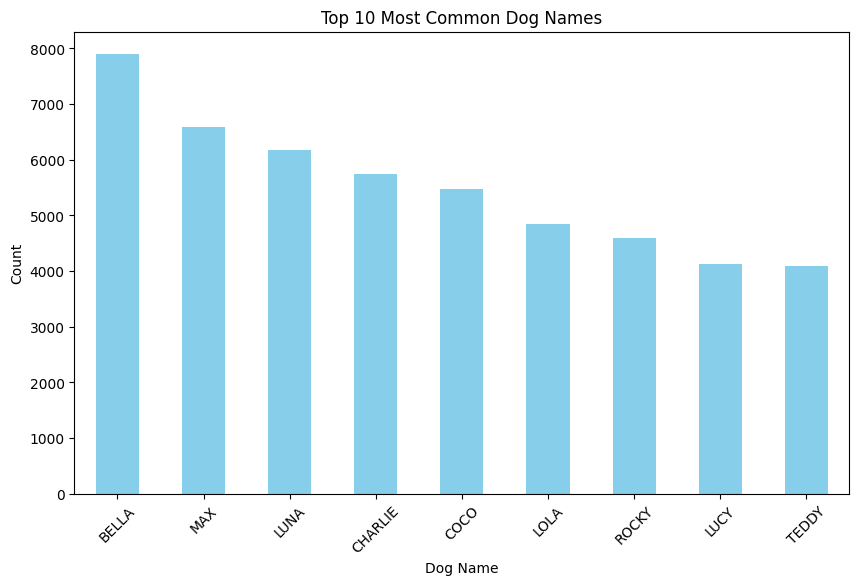

In [29]:
import matplotlib.pyplot as plt

df['AnimalName'].value_counts().iloc[1:10].plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Top 10 Most Common Dog Names')
plt.xlabel('Dog Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [13]:
df.head()

,AnimalName,AnimalGender,AnimalBirthYear,BreedName,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
0,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,10035.0,2014-09-12,2017-09-12,2016
1,YOGI,M,2010,Boxer,10465.0,2014-09-12,2017-10-02,2016
2,ALI,M,2014,Basenji,10013.0,2014-09-12,2019-09-12,2016
3,QUEEN,F,2013,Akita Crossbreed,10013.0,2014-09-12,2017-09-12,2016
4,LOLA,F,2009,Maltese,10028.0,2014-09-12,2017-10-09,2016


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722864 entries, 0 to 722863
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   AnimalName          721054 non-null  object        
 1   AnimalGender        722843 non-null  object        
 2   AnimalBirthYear     722864 non-null  object        
 3   BreedName           722864 non-null  object        
 4   ZipCode             722855 non-null  float64       
 5   LicenseIssuedDate   722864 non-null  datetime64[ns]
 6   LicenseExpiredDate  722782 non-null  datetime64[ns]
 7   Extract Year        722864 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 44.1+ MB


# Top 10 Popular Dog Breeds 

What are the most popular dog breeds in NYC?

In [15]:
#Create new dataframe

breeds_ranking = df['BreedName'].value_counts().reset_index()
breeds_ranking.columns = ['BreedName', 'Count']

In [16]:
print(breeds_ranking.head(60))

                               BreedName  Count
0                                Unknown  63558
1                      Yorkshire Terrier  40224
2                               Shih Tzu  37108
3                              Chihuahua  28086
4                     Labrador Retriever  21852
5                                Maltese  20858
6          Labrador Retriever Crossbreed  19334
7   American Pit Bull Mix / Pit Bull Mix  17271
8                    Shih Tzu Crossbreed  14549
9                             Pomeranian  13984
10                     Poodle Crossbreed  13440
11    American Pit Bull Terrier/Pit Bull  13131
12                              Havanese  12265
13                  Chihuahua Crossbreed  11548
14                      Golden Retriever  10890
15                        French Bulldog  10839
16                                Beagle  10178
17                   German Shepherd Dog  10130
18                          Goldendoodle  10115
19                           Terrier mix

In [17]:
# Clean data - "Unknown" and "Not Provided" should be one value

df['BreedName'] = df['BreedName'].replace({
    'Unknown': 'Unknown',
    'Not Provided': 'Unknown'
})

In [18]:
#now it should be cleaned

breed_ranking = df['BreedName'].value_counts().reset_index()
breed_ranking.columns = ['BreedName', 'Count']



In [19]:
breed_ranking.shape

(1594, 2)

In [20]:
#Create CSV

breed_ranking.to_csv('breed_ranking.csv')


In [21]:
#With Unknown

breed_ranking.head(20)

,BreedName,Count
0,Unknown,69471
1,Yorkshire Terrier,40224
2,Shih Tzu,37108
3,Chihuahua,28086
4,Labrador Retriever,21852
5,Maltese,20858
6,Labrador Retriever Crossbreed,19334
7,American Pit Bull Mix / Pit Bull Mix,17271
8,Shih Tzu Crossbreed,14549
9,Pomeranian,13984


In [83]:
#Without Unknown 

#breed_ranking[breed_ranking['BreedName'] != 'Unknown'].head(20)

,BreedName,Count
1,Yorkshire Terrier,40224
2,Shih Tzu,37108
3,Chihuahua,28086
4,Labrador Retriever,21852
5,Maltese,20858
6,Labrador Retriever Crossbreed,19334
7,American Pit Bull Mix / Pit Bull Mix,17271
8,Shih Tzu Crossbreed,14549
9,Pomeranian,13984
10,Poodle Crossbreed,13440


In [22]:
#What is the percentage of the Unknown though?

df['BreedName'].value_counts(normalize=True) *100



BreedName
Unknown                                       9.610521
Yorkshire Terrier                             5.564532
Shih Tzu                                      5.133469
Chihuahua                                     3.885378
Labrador Retriever                            3.022975
                                                ...   
Husky/Collie Mix                              0.000138
Border Collie-Black Labrador Retriever Mix    0.000138
BRAUZER                                       0.000138
Slorky                                        0.000138
Yorkie/Bichon                                 0.000138
Name: proportion, Length: 1594, dtype: float64

In [23]:
# Create new column 

total_count = breed_ranking['Count'].sum()

# Add a new column 'Share' with the relative frequency 
breed_ranking['Share'] = (breed_ranking['Count'] / total_count * 100).round(2)


In [24]:
print(breed_ranking.head())

            BreedName  Count  Share
0             Unknown  69471   9.61
1   Yorkshire Terrier  40224   5.56
2            Shih Tzu  37108   5.13
3           Chihuahua  28086   3.89
4  Labrador Retriever  21852   3.02


In [25]:
#Create CSV

breed_ranking.to_csv('breed_ranking.csv')


In [26]:
#another version without Unknown

(breed_ranking[breed_ranking['BreedName'] != 'Unknown'].head(0)).round(4)

,BreedName,Count,Share


In [28]:
df.head()

,AnimalName,AnimalGender,AnimalBirthYear,BreedName,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
0,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,10035.0,2014-09-12,2017-09-12,2016
1,YOGI,M,2010,Boxer,10465.0,2014-09-12,2017-10-02,2016
2,ALI,M,2014,Basenji,10013.0,2014-09-12,2019-09-12,2016
3,QUEEN,F,2013,Akita Crossbreed,10013.0,2014-09-12,2017-09-12,2016
4,LOLA,F,2009,Maltese,10028.0,2014-09-12,2017-10-09,2016


In [38]:
df['ZipCode']

0         10035.0
1         10465.0
2         10013.0
3         10013.0
4         10028.0
           ...   
722859    11204.0
722860    10463.0
722861    11215.0
722862    11249.0
722863    11378.0
Name: ZipCode, Length: 722864, dtype: float64

In [41]:
result = df.groupby(['BreedName', 'ZipCode']).size().reset_index(name='counts')
print(result)

                 BreedName  ZipCode  counts
0                  6152012  10014.0       1
1            AFFENPINSCHER  10022.0       1
2                AKITA MIX  11004.0       1
3         ALASKAN KLEE KAI  10022.0       1
4      AM ESKIMO / MALTESE  11249.0       1
...                    ...      ...     ...
31764       yorkie/maltese  11374.0       1
31765            yorkiepoo  10304.0       1
31766            yorkiepoo  10308.0       1
31767            yorkiepoo  11201.0       1
31768               zuchon  10312.0       1

[31769 rows x 3 columns]


In [49]:

# 1. delete NaN 
df_clean = df.dropna(subset=['ZipCode']).copy()

# 2. convert ZipCode to String
df_clean['ZipCode'] = df_clean['ZipCode'].astype(int).astype(str).str.zfill(5)

# 3. filter 'Unknown' out of BreedName 
df_clean = df_clean[df_clean['BreedName'] != 'Unknown']

# 5. group and count
result = df_nyc.groupby(['BreedName', 'ZipCode']).size().reset_index(name='counts')

# 6. for everyy ZipCode find the most popular breed
idx = result.groupby('ZipCode')['counts'].idxmax()
most_popular_per_zip = result.loc[idx].reset_index(drop=True)

print(most_popular_per_zip)



              BreedName ZipCode  counts
0             Chihuahua   10001     200
1     Yorkshire Terrier   10002     408
2             Chihuahua   10003     312
3        French Bulldog   10004      43
4        French Bulldog   10005     100
..                  ...     ...     ...
436   Yorkshire Terrier   11692     117
437   Yorkshire Terrier   11693     110
438            Shih Tzu   11694     116
439   Yorkshire Terrier   11695       1
440  Labrador Retriever   11697      39

[441 rows x 3 columns]


In [51]:
most_popular_per_zip.to_csv('most_popular_per_zip.csv')